In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Embedding,Dense,Dropout

In [20]:
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words = 5000)

In [21]:
def show_review(review):
    indexes = imdb.get_word_index()
    reverse_word_index = {y:x for x,y in indexes.items()}
    return " ".join(reverse_word_index.get(idx-3,'?') for idx in review)

show_review(X_train[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly ? was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little ? that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story wa

In [30]:
X_train = pad_sequences(X_train,400)
X_test = pad_sequences(X_test,400)
X_train.shape,X_test.shape

((25000, 400), (25000, 400))

In [34]:
model = Sequential()
model.add(Embedding(5000,32,input_length = 400))
model.add(LSTM(32,activation = 'tanh'))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

In [35]:
model.compile(optimizer = 'Adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [36]:
model.fit(X_train,y_train,epochs = 5, validation_split = 0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 106ms/step - accuracy: 0.6703 - loss: 0.5695 - val_accuracy: 0.8666 - val_loss: 0.3159
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 108ms/step - accuracy: 0.8798 - loss: 0.3016 - val_accuracy: 0.8720 - val_loss: 0.3052
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 109ms/step - accuracy: 0.9101 - loss: 0.2362 - val_accuracy: 0.8410 - val_loss: 0.3690
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 109ms/step - accuracy: 0.9198 - loss: 0.2057 - val_accuracy: 0.8702 - val_loss: 0.3460
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 114ms/step - accuracy: 0.9447 - loss: 0.1523 - val_accuracy: 0.8686 - val_loss: 0.3529


782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step


<Axes: >

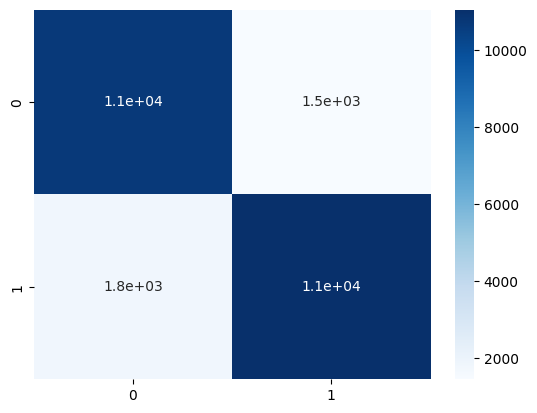

In [40]:
y_preds = model.predict(X_test)
y_preds = np.where(y_preds>=0.5 , 1, 0)
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_preds,y_test),cmap='Blues',annot = True)